In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
import io
import pandas as pd
df = pd.read_csv('causality_sample_data.csv')
print('Data shape:', df.shape)

Data shape: (5040, 8)


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
sns.set(style='whitegrid')

In [7]:
if 'post' not in df.columns:
    df['post'] = (df['month'] > 18).astype(int)

In [8]:
# Optional: Display the first few rows of the data to verify
print(df.head())

# Check the number of observations in the treated and control groups
print("Observations per group:")
print(df.groupby('treat').size())

   id  treat  month  post  treatxpost  frq_purchases  qty_purchases  \
0   1      0      1     0           0              2              5   
1   1      0      2     0           0              2              2   
2   1      0      3     0           0              2              2   
3   1      0      4     0           0              1              2   
4   1      0      5     0           0              2              2   

   val_purchases  
0     103.530647  
1      91.278852  
2     105.050546  
3     102.462394  
4     106.862236  
Observations per group:
treat
0    2628
1    2412
dtype: int64


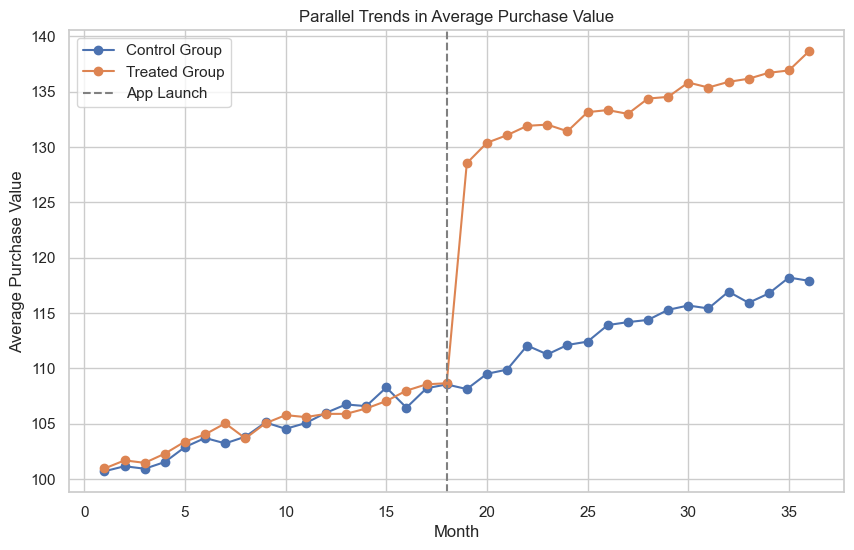

In [9]:
# Calculate the average purchase value by month and treatment group
avg_val = df.groupby(['month', 'treat'])['val_purchases'].mean().reset_index()

# Pivot the data so that each treatment group has its own column
pivot_avg = avg_val.pivot(index='month', columns='treat', values='val_purchases')

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(pivot_avg.index, pivot_avg[0], marker='o', label='Control Group')
plt.plot(pivot_avg.index, pivot_avg[1], marker='o', label='Treated Group')
plt.axvline(x=18, color='gray', linestyle='--', label='App Launch')
plt.xlabel('Month')
plt.ylabel('Average Purchase Value')
plt.title('Parallel Trends in Average Purchase Value')
plt.legend()
plt.show()

In [10]:
# We include fixed effects by converting 'id' and 'month' into categorical variables.
model = smf.ols('val_purchases ~ treat + post + treatxpost + C(id) + C(month)', data=df)
results = model.fit(cov_type='cluster', cov_kwds={'groups': df['id']})

# Print the regression summary; the coefficient on 'treatxpost' should be significant and positive.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          val_purchases   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                -3.840e-09
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               1.00
Time:                        22:38:31   Log-Likelihood:                -15203.
No. Observations:                5040   AIC:                         3.076e+04
Df Residuals:                    4864   BIC:                         3.191e+04
Df Model:                         175                                         
Covariance Type:              cluster                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        100.8506    484.717      0.

/Users/SagarBhatt/.pyenv/versions/3.12.8/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 177, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/SagarBhatt/.pyenv/versions/3.12.8/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1884: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
